Enter your client ID (0 to n-1):  1


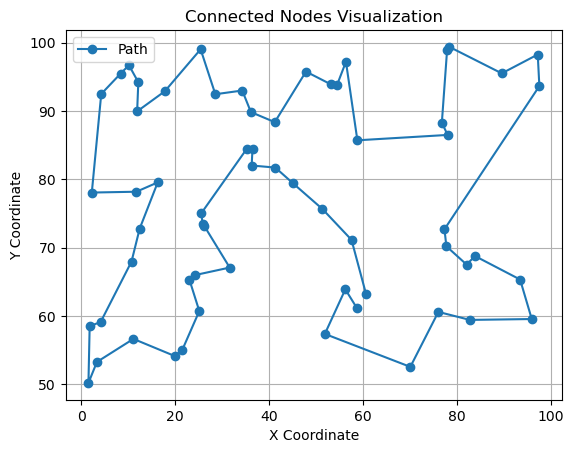

In [7]:
import socket
import numpy as np 
import matplotlib.pyplot as plt

PORT = 12345  # Define the port number used for server communication.

# Function to plot the path
def plot_path(path):
    plt.figure()  # Create a new figure for plotting.
    x_temp = path[:, 0]  # Extract the x-coordinates from the path array.
    y_temp = path[:, 1]  # Extract the y-coordinates from the path array.
    plt.plot(x_temp, y_temp, marker='o', label='Path')  # Plot the path with markers.
    plt.title('Connected Nodes Visualization')  # Set the title of the plot.
    plt.xlabel('X Coordinate')  # Label the x-axis.
    plt.ylabel('Y Coordinate')  # Label the y-axis.
    plt.scatter(path[:, 0], path[:, 1], color='black', s=10)  # Scatter plot of the nodes on the path.
    plt.legend()  # Display the legend for the plot.
    plt.grid(True)  # Enable the grid for better readability.
    plt.show()  # Display the plot to the user.

# Main client function
def start_client(client_id):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as client_socket:  # Create a TCP socket.
        client_socket.connect(('localhost', PORT))  # Connect to the server at localhost on the defined port.
        client_socket.sendall(str(client_id).encode('utf-8'))  # Send the client ID to the server after encoding it to bytes.
        path_bytes = client_socket.recv(4096)  # Receive up to 4096 bytes of data from the server, which contains the path.
        
        # The path received is in bytes, convert back to numpy array
        path = np.frombuffer(path_bytes, dtype=np.float32).reshape((-1, 2))  # Convert bytes to a NumPy array of shape (-1, 2) for x and y coordinates.
        plot_path(path)  # Call the function to plot the path received from the server.

# Entry point for the client
if __name__ == "__main__":  # Check if this script is being run directly (not imported).
    client_id = int(input("Enter your client ID (0 to n-1): "))  # Prompt the user for their client ID.
    start_client(client_id)  # Start the client function with the provided client ID.

Enter the total number of computers:  8


C:\Users\mosi1\AppData\Local\Temp\ipykernel_18448\1625393462.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Show the legend for the plot; will only work if labels are added.


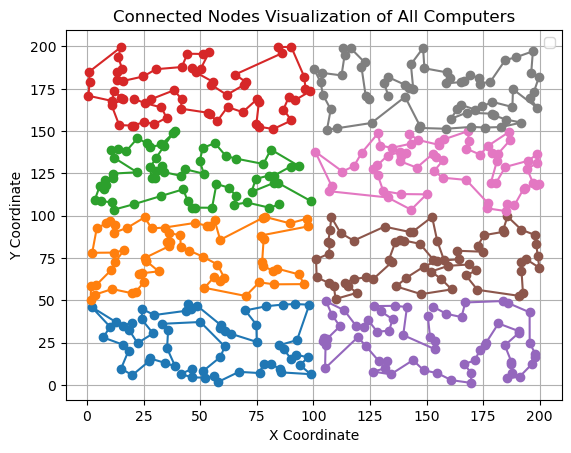

In [9]:
import socket
import numpy as np
import matplotlib.pyplot as plt

PORT = 12345  # Define the port number used for communication with the server.

# Function to plot the paths of all computers
def plot_paths(all_paths):
    plt.figure()  # Create a new figure for plotting all paths.
    for i, path in enumerate(all_paths):  # Iterate over each path, keeping track of the index (computer ID).
        x_temp = path[:, 0]  # Extract x-coordinates from the current path array.
        y_temp = path[:, 1]  # Extract y-coordinates from the current path array.
        plt.plot(x_temp, y_temp, marker='o')  # Plot the path with markers for each node.

        # plt.plot(x_temp, y_temp, marker='o', label=f'Computer {i+1}')
    
    plt.title('Connected Nodes Visualization of All Computers')  # Set the title for the plot.
    plt.xlabel('X Coordinate')  # Label the x-axis for clarity.
    plt.ylabel('Y Coordinate')  # Label the y-axis for clarity.
    plt.legend()  # Show the legend for the plot; will only work if labels are added.
    plt.grid(True)  # Enable a grid in the plot for better readability of the visualization.
    plt.show()  # Display the plot to the user.

# Main client function to communicate with the server and retrieve paths
def start_client(num_computers):
    all_paths = []  # Initialize a list to store paths from all computers.
    
    for client_id in range(num_computers):  # Loop over the number of computers defined by the user.
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as client_socket:  # Create a new TCP socket for each computer.
            client_socket.connect(('localhost', PORT))  # Connect to the server running on localhost at the specified port.
            client_socket.sendall(str(client_id).encode('utf-8'))  # Send the client ID to the server, encoded as bytes.
            path_bytes = client_socket.recv(4096)  # Receive up to 4096 bytes of data from the server, which represents the path.
            
            # Convert the received bytes to a NumPy array with shape determined by (-1, 2) for 2D coordinates.
            path = np.frombuffer(path_bytes, dtype=np.float32).reshape((-1, 2))  
            all_paths.append(path)  # Append the current path to the list of all paths.

    # Call the function to plot all paths received from the clients.
    plot_paths(all_paths)

# Entry point for the client
if __name__ == "__main__":  # Check if the script is being executed directly (not imported).
    num_computers = int(input("Enter the total number of computers: "))  # Prompt the user to input the number of computers.
    start_client(num_computers)  # Start the client operation using the number of computers specified.